In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import random
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET_PATH = '/content/drive/MyDrive/Mestrado/'
DATASET_NAME = 'heart_failure_clinical_records_dataset.csv'

In [ ]:
def load_data(dataset_path=DATASET_PATH, dataset_name=DATASET_NAME):
    csv_path = os.path.join(dataset_path, dataset_name)
    return pd.read_csv(csv_path)

pima = load_data(DATASET_PATH, DATASET_NAME)

In [ ]:
pima.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
pima.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
pima.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#Classificação

##Divisão de treino e teste

In [ ]:
target = 'DEATH_EVENT'

In [ ]:
X = pima.drop(columns=[target])
y = pima[target]

##knn

In [ ]:
def run_knn(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    return model.predict(X_test)

##Naives Bayes

In [ ]:
def run_naive_bayes(X_train, X_test, y_train, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)
    return model.predict(X_test)

##Randon Forest

In [ ]:
def run_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model.predict(X_test)

##Gradient Boosting

In [ ]:
def run_gradient_boosting(X_train, X_test, y_train, y_test):
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    return model.predict(X_test)

## MLP

In [ ]:
def run_mlp(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    return model.predict(X_test_scaled)

## Avaliação

In [ ]:
models = {
    'KNN': run_knn,
    'MLP': run_mlp,
    'NaiveBayes': run_naive_bayes,
    'GradientBoosting': run_gradient_boosting,
    'RandomForest': run_random_forest
}

results = {name: {'acc': [], 'prec': [], 'rec': []} for name in models}

for _ in range(5):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=None
    )

    for name, model_func in models.items():
        y_pred = model_func(X_train, X_test, y_train, y_test)
        results[name]['acc'].append(accuracy_score(y_test, y_pred))
        results[name]['prec'].append(precision_score(y_test, y_pred, zero_division=0))
        results[name]['rec'].append(recall_score(y_test, y_pred, zero_division=0))

In [ ]:
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Acurácia: {np.mean(metrics['acc']):.3f} ± {np.std(metrics['acc']):.3f}")
    print(f"Precisão: {np.mean(metrics['prec']):.3f} ± {np.std(metrics['prec']):.3f}")
    print(f"Recall: {np.mean(metrics['rec']):.3f} ± {np.std(metrics['rec']):.3f}")



KNN:
Acurácia: 0.613 ± 0.029
Precisão: 0.293 ± 0.112
Recall: 0.172 ± 0.102

MLP:
Acurácia: 0.762 ± 0.035
Precisão: 0.646 ± 0.063
Recall: 0.600 ± 0.068

NaiveBayes:
Acurácia: 0.791 ± 0.013
Precisão: 0.781 ± 0.048
Recall: 0.497 ± 0.056

GradientBoosting:
Acurácia: 0.798 ± 0.011
Precisão: 0.710 ± 0.040
Recall: 0.641 ± 0.047

RandomForest:
Acurácia: 0.836 ± 0.036
Precisão: 0.783 ± 0.098
Recall: 0.697 ± 0.026


In [ ]:
rows = []
for model_name, metrics in results.items():
    for i in range(len(metrics['acc'])):
        rows.append({
            'Modelo': model_name,
            'Rodada': i + 1,
            'Acurácia': metrics['acc'][i],
            'Precisão': metrics['prec'][i],
            'Recall': metrics['rec'][i]
        })

df_resultados = pd.DataFrame(rows)

/tmp/ipython-input-21-4260157034.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_resultados, x='Modelo', y='Acurácia', ci='sd')


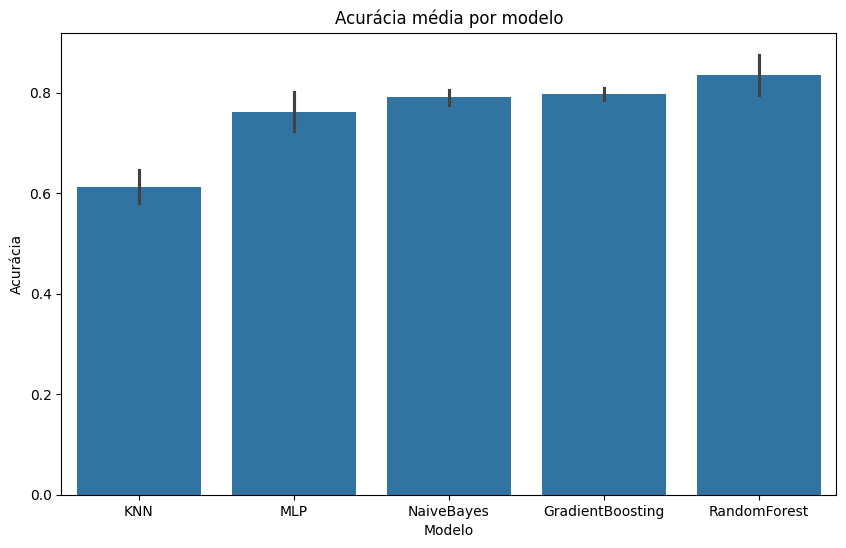

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados, x='Modelo', y='Acurácia', ci='sd')
plt.title("Acurácia média por modelo")
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.show()

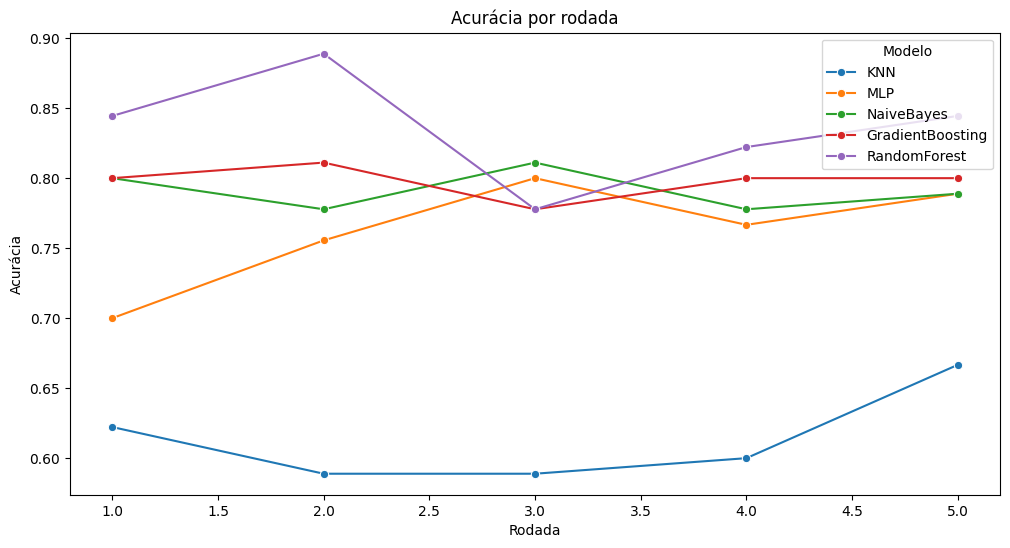

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resultados, x='Rodada', y='Acurácia', hue='Modelo', marker='o')
plt.title("Acurácia por rodada")
plt.ylabel("Acurácia")
plt.xlabel("Rodada")
plt.show()
